# Histograms, Binnings, and Density
useful functions:
+ ``plt.hist`` -- plot a histogram
+ ``np.histogram`` -- calculate a histogram
+ ``sns.distplot`` -- plot the density 
+ ``plt.hist2d`` and ``np.histogram2d`` -- plot 2d histogram

In [124]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

### ``plt.hist`` to display the histogram

(array([ 12.,  43., 117., 222., 252., 199.,  99.,  46.,   8.,   2.]),
 array([-2.89841794, -2.25044392, -1.60246989, -0.95449587, -0.30652184,
         0.34145218,  0.9894262 ,  1.63740023,  2.28537425,  2.93334828,
         3.5813223 ]),
 <a list of 10 Patch objects>)

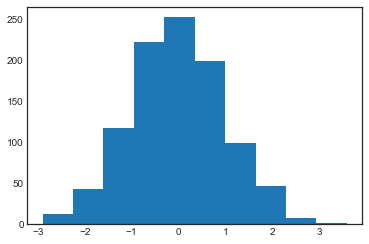

In [49]:
plt.hist(data) # add a semicolon can prevent the unecessary print out

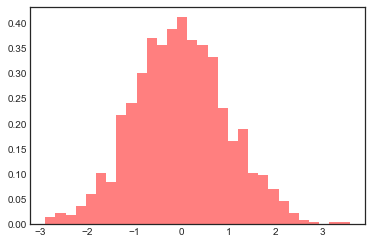

In [17]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='red',
         edgecolor='none'); # this semicolon here is to prevent the unecessary print out

In [6]:
plt.hist?

### ``np.histogram()`` : simply compute the histogram and not display it

In [18]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 55 339 451 145  10]
[-2.89841794 -1.60246989 -0.30652184  0.9894262   2.28537425  3.5813223 ]


### Add count to the density plot

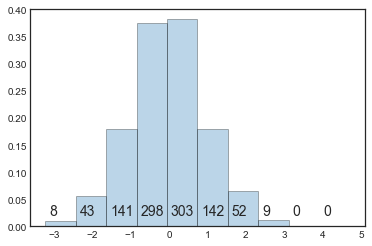

In [139]:
binnum = 10
counts, bins, _ = plt.hist(data, bins=binnum, density= True, histtype='bar', edgecolor = 'black', alpha=0.3)
counts /= sum(counts) # this step is important, sum(counts) != 1, the underlying area is 1
counts *= len(data)

for i in range(binnum):
    plt.text(bins[i]+0.1, 0.02, int(counts[i]), fontsize = 14)

### Add density estimation to hist -- use ``sns.distplot`` in ``seaborn``

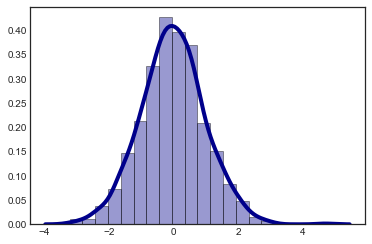

In [130]:
import seaborn as sns
sns.distplot(data.T, hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

## display multiple data in one plot

### overlaped histogram

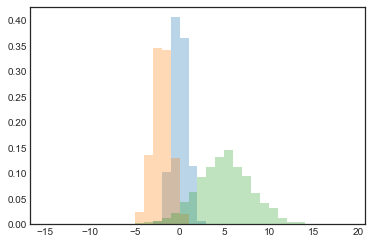

In [115]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 2000)
x3 = np.random.normal(5, 3, 3000)

kwargs = dict(histtype='bar', alpha=0.3, density=True, bins = range(-15, 20, 1))

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs); # this semicolon here is to prevent the unecessary print out

### side-by-side comparison

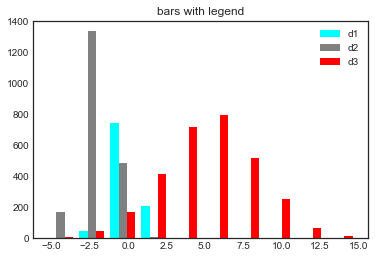

In [118]:
colors = ['cyan', 'gray', 'red']
names = ['d1', 'd2', 'd3']
plt.hist((x1, x2, x3), bins = 10, histtype='bar', color=colors, label=names)
plt.legend(prop={'size': 10})
plt.title('bars with legend');

### stacked comparison -- ``stacked = True``

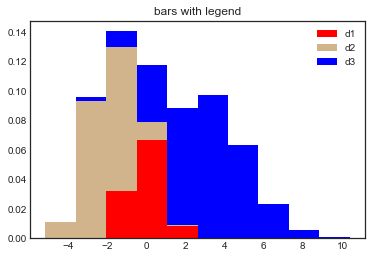

In [99]:
colors = ['red', 'tan', 'blue']
names = ['d1', 'd2', 'd3']
plt.hist((x1, x2, x3), bins = 10, density=True, histtype='bar', stacked = True, color=colors, label=names)
plt.legend(prop={'size': 10})
plt.title('bars with legend');

## Two-Dimensional Histograms and Binnings

In [67]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

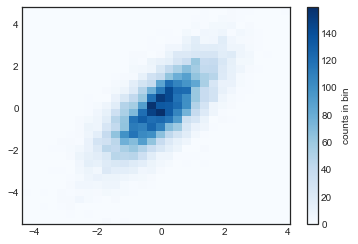

In [68]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [71]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
counts.shape

(30, 30)

### use ``np.histgramdd`` to handle 2+ dimension data

In [81]:
mean = [0, 0, 10]
cov = [[2, 1, 0], [1, 2, 1], [0,1,3]]
x, y, z = np.random.multivariate_normal(mean, cov, 10000).T
counts, edges = np.histogramdd(sample = (x, y, z))
counts.shape
# edges is a list of three arrays

(10, 10, 10)

### ``plt.hexbin``: Hexagonal binnings

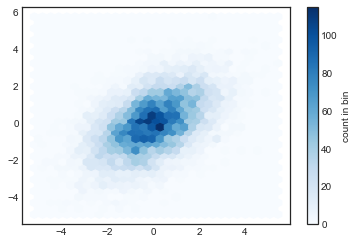

In [120]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Kernel density estimation  -- use kernal estimation
this purpose can also be achieved by ``seaborn``

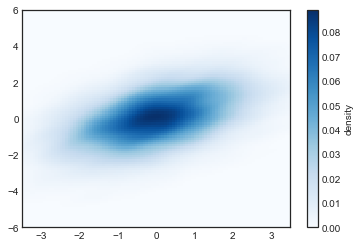

In [140]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 100)
ygrid = np.linspace(-6, 6, 100)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")